In [108]:
import models
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median

In [109]:
df = pd.read_excel("model_one_results.xlsx", sheet_name="5.4", skiprows=2)

In [110]:
def max_degree(G):
    # Initialize max_degree
    max_degree = -1

    # Iterate over all nodes and their degrees
    for degree in G.degree():
        if degree[1] > max_degree:
            max_degree = degree[1]
    
    return max_degree

# Model One

In [111]:
# Check if planar and connected
planar = []
connected = []
median_deg = []
max_deg = []

for index, row in df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    base = int(row["prob_base_num"])
    G = models.model_one(n, rs, base)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_one_df = df.assign(planar=planar, connected=connected, median_deg=median_deg, max_deg=max_deg)

In [112]:
model_one_df

,rand_seed,num_vertices,prob_base_num,avg_deg,planar,connected,median_deg,max_deg
0,9,20,24.5,5.40,False,True,5.0,9
1,13,20,18.0,5.40,False,True,5.5,8
2,23,20,15.9,5.40,False,True,5.5,9
3,47,20,25.0,5.40,False,True,5.0,9
4,49,20,33.0,5.40,False,True,5.0,10
5,50,20,26.0,5.40,False,True,5.0,10
6,69,20,27.0,5.40,False,True,5.0,9
7,9,30,63.0,5.40,False,True,5.0,10
8,13,30,85.0,5.40,False,True,5.0,10
9,23,30,63.0,5.40,False,True,5.0,10


In [113]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_one_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = columns_avg.to_frame(name = "Model 1")

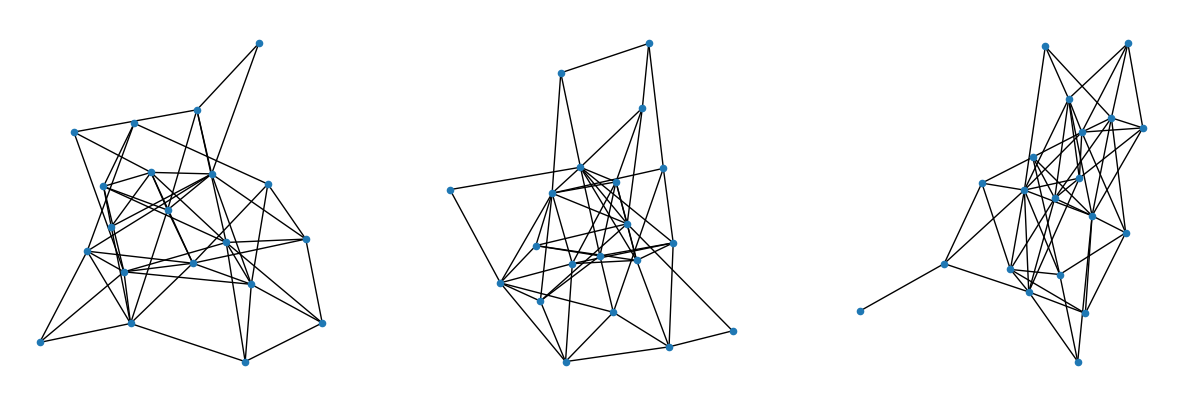

In [114]:
# Create graphs with 20 vertices
G1 = models.model_one(20, 13, 18)
G2 = models.model_one(20, 47, 25)
G3 = models.model_one(20, 50, 26)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

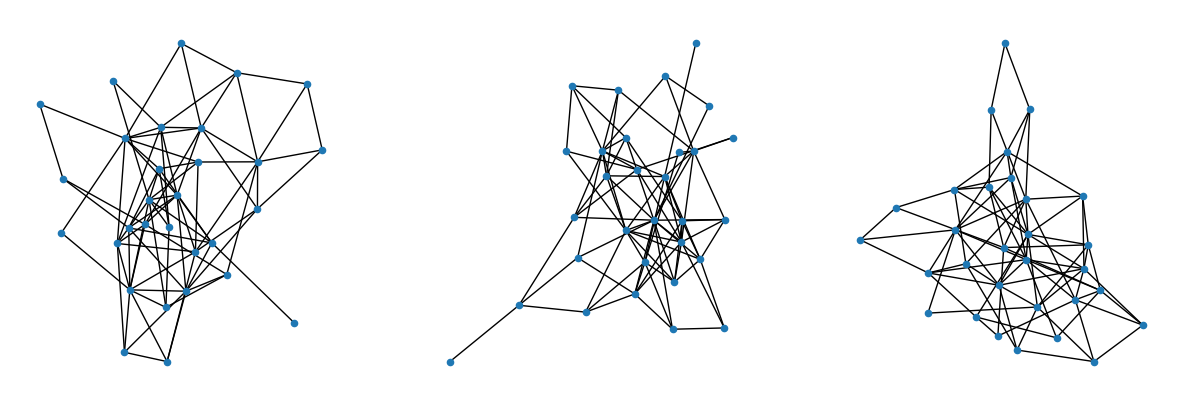

In [115]:
# Create graphs with 30 vertices
G1 = models.model_one(30, 13, 85)
G2 = models.model_one(30, 47, 135)
G3 = models.model_one(30, 50, 60)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

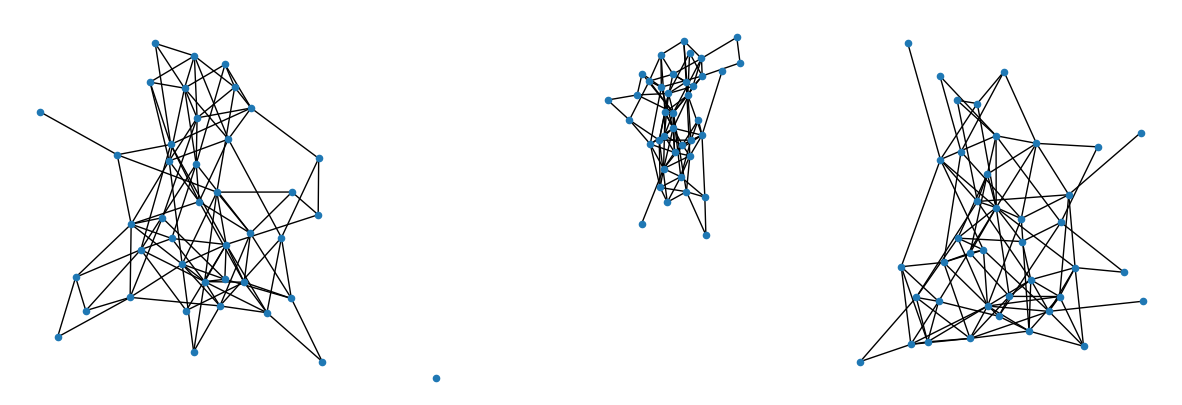

In [116]:
# Create graphs with 40 vertices
G1 = models.model_one(40, 13, 180)
G2 = models.model_one(40, 47, 360)
G3 = models.model_one(40, 50, 103)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

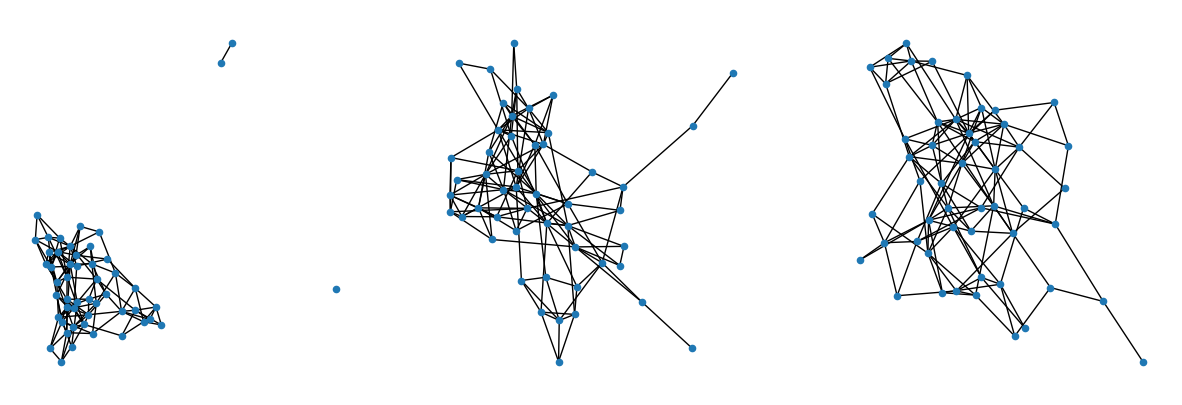

In [117]:
# Create graphs with 50 vertices
G1 = models.model_one(50, 13, 660)
G2 = models.model_one(50, 47, 340)
G3 = models.model_one(50, 50, 429)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: Graphs are not planar, but most are connected although some aren't.

# Model Two

In [118]:
new_df = df[["num_vertices", "rand_seed"]].drop_duplicates()

# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in new_df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_two(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_two_df = new_df.assign(planar=planar, connected=connected, avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [119]:
model_two_df

,num_vertices,rand_seed,planar,connected,avg_deg,median_deg,max_deg
0,20,9,False,True,10.8,10.0,17
1,20,13,False,True,10.8,10.0,18
2,20,23,False,True,10.8,11.0,17
3,20,47,False,True,10.8,12.0,17
4,20,49,False,True,10.8,10.0,17
5,20,50,False,True,10.8,10.0,18
6,20,69,False,True,10.8,11.0,18
7,30,9,False,True,10.8,11.0,18
8,30,13,False,True,10.8,11.0,18
9,30,23,False,True,10.8,10.5,18


In [120]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_two_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 2')], axis=1)

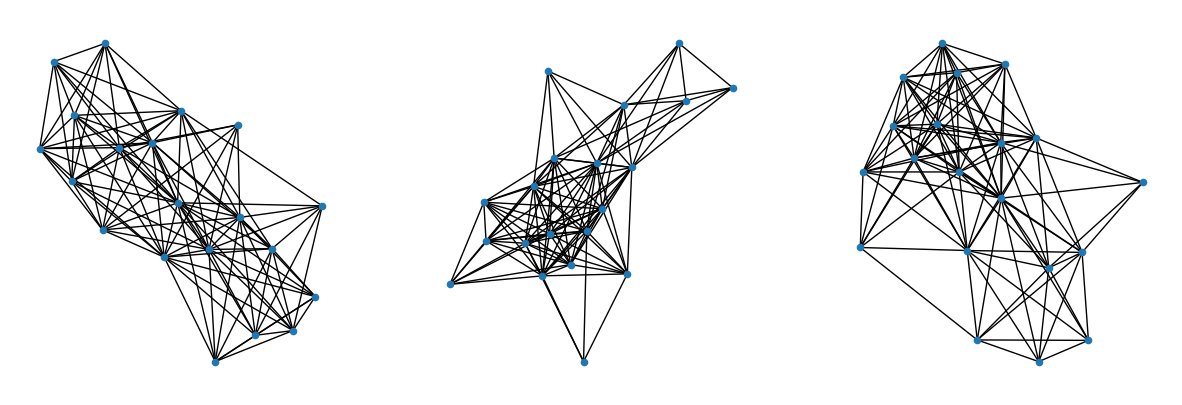

In [121]:
# Create graphs with 20 vertices
G1 = models.model_two(20, 13)
G2 = models.model_two(20, 47)
G3 = models.model_two(20, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

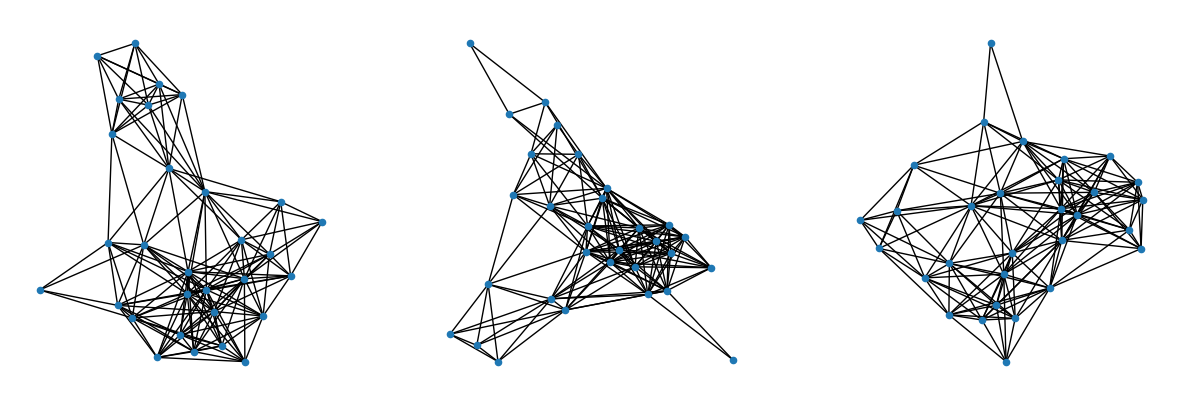

In [122]:
# Create graphs with 30 vertices
G1 = models.model_two(30, 13)
G2 = models.model_two(30, 47)
G3 = models.model_two(30, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

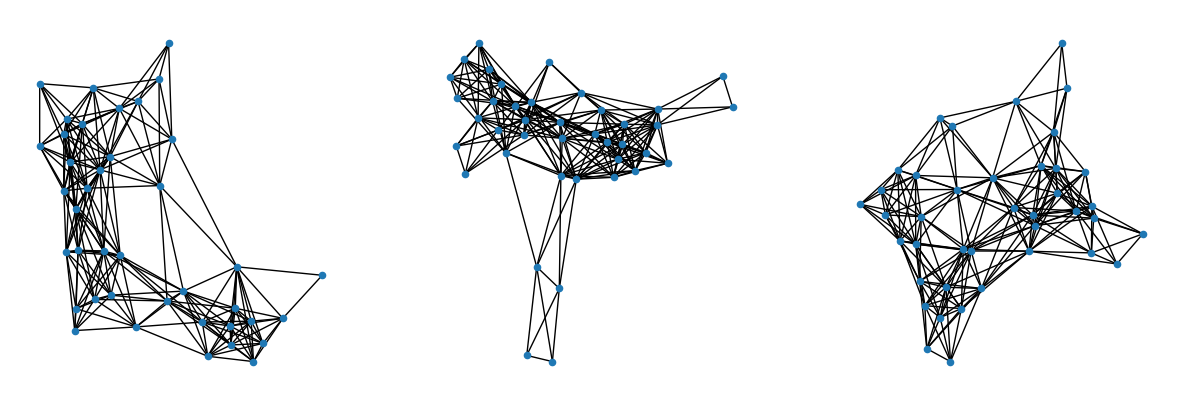

In [123]:
# Create graphs with 40 vertices
G1 = models.model_two(40, 13)
G2 = models.model_two(40, 47)
G3 = models.model_two(40, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

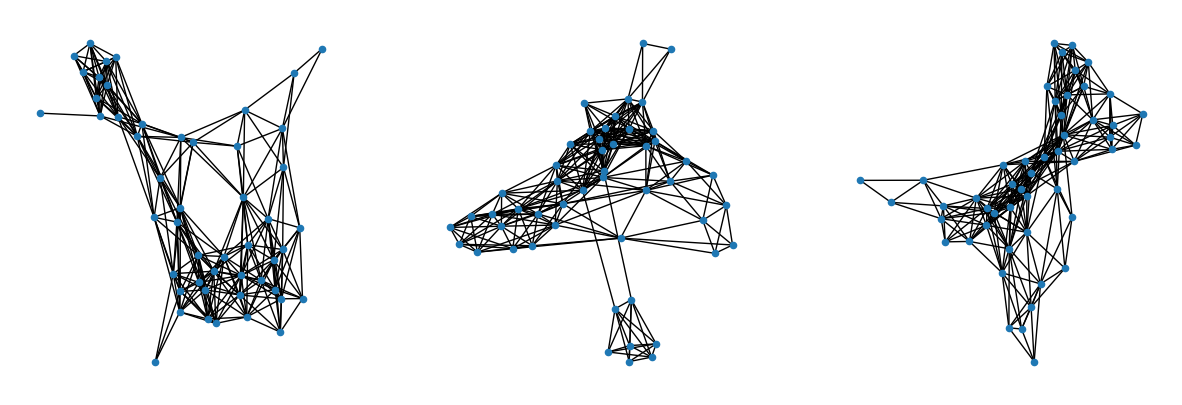

In [124]:
# Create graphs with 50 vertices
G1 = models.model_two(50, 13)
G2 = models.model_two(50, 47)
G3 = models.model_two(50, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: None are planar and one is not connected. Random seed 23 with 40 vertices. Althought it seems like there are too many edges, but I'm not sure.

# Model Three

In [125]:
new_df = df[["num_vertices", "rand_seed"]].drop_duplicates()

# Check if planar and connected
planar = []
connected = []
avg_deg = []
median_deg = []
max_deg = []

for index, row in new_df.iterrows():
    n = int(row["num_vertices"])
    rs = int(row["rand_seed"])
    G = models.model_three(n, rs)

    # Planar?
    planar.append(nx.check_planarity(G)[0])
    
    # Connected?
    connected.append(nx.is_connected(G))

    # Calculate avg degree of graph
    avg_deg.append(2 * G.number_of_edges() / G.number_of_nodes())
    
    # Calculate median degree of graph
    degrees = sorted([degree for _, degree in G.degree()], reverse=False)
    median_deg.append(median(degrees))

    # Calculate max degree
    max_deg.append(max_degree(G))

model_three_df = new_df.assign(planar=planar, connected=connected, avg_deg=avg_deg, median_deg=median_deg, max_deg=max_deg)

In [126]:
model_three_df

,num_vertices,rand_seed,planar,connected,avg_deg,median_deg,max_deg
0,20,9,True,True,4.600000,5.0,8
1,20,13,True,True,5.000000,5.0,7
2,20,23,True,True,5.000000,5.0,7
3,20,47,True,True,4.900000,5.0,7
4,20,49,True,True,4.900000,5.0,8
5,20,50,True,True,4.900000,5.0,9
6,20,69,True,True,4.800000,5.0,8
7,30,9,True,True,5.066667,5.0,8
8,30,13,True,True,5.266667,5.0,8
9,30,23,True,True,5.266667,5.0,7


In [127]:
# Calculate the average of planar, connected, median_deg, max_deg
columns_avg = model_three_df[['planar', 'connected', 'avg_deg', 'median_deg', 'max_deg']].mean()
model_avgs = pd.concat([model_avgs, columns_avg.rename('Model 3')], axis=1)

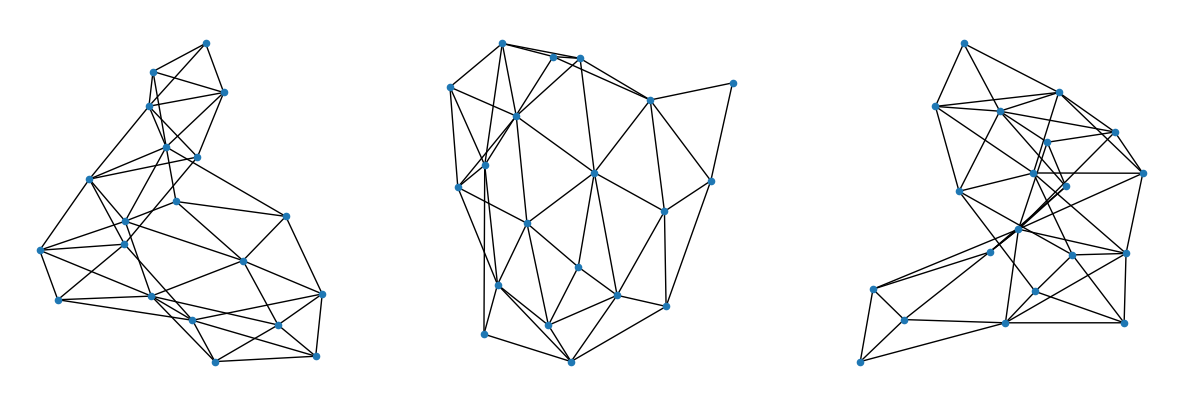

In [128]:
# Create graphs with 20 vertices
G1 = models.model_three(20, 13)
G2 = models.model_three(20, 47)
G3 = models.model_three(20, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

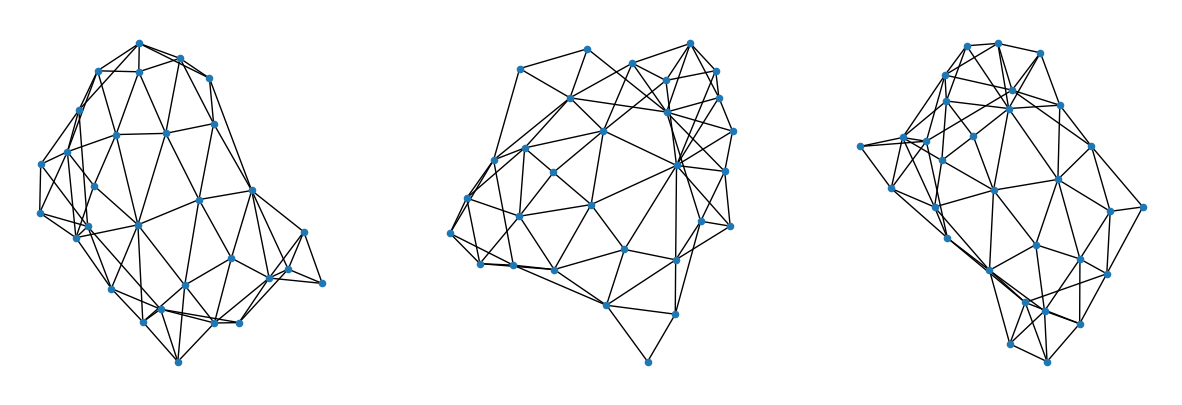

In [129]:
# Create graphs with 30 vertices
G1 = models.model_three(30, 13)
G2 = models.model_three(30, 47)
G3 = models.model_three(30, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

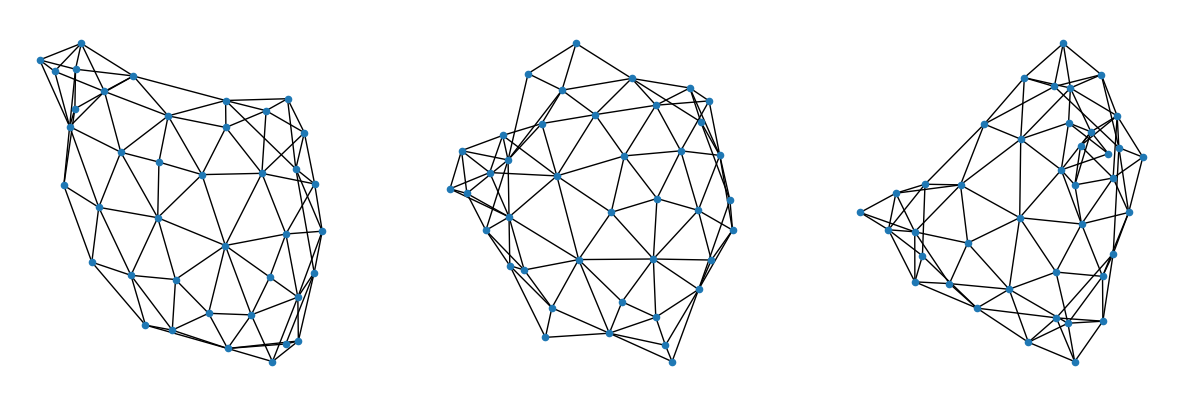

In [130]:
# Create graphs with 40 vertices
G1 = models.model_three(40, 13)
G2 = models.model_three(40, 47)
G3 = models.model_three(40, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

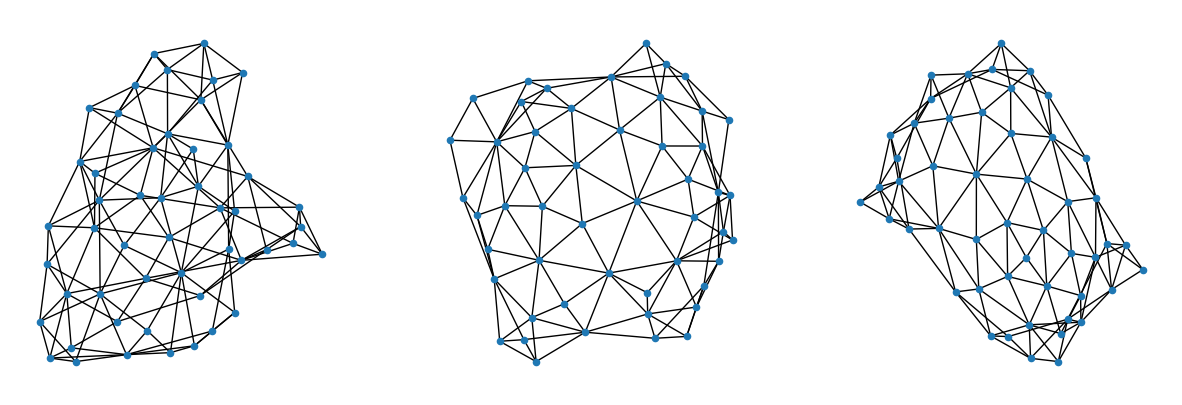

In [131]:
# Create graphs with 50 vertices
G1 = models.model_three(50, 13)
G2 = models.model_three(50, 47)
G3 = models.model_three(50, 50)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

nx.draw(G1, node_size = 20, ax=axes[0])
nx.draw(G2, node_size = 20, ax=axes[1])
nx.draw(G3, node_size = 20, ax=axes[2])

**Conclusion**: All are planar and connected.

# Compare Model Averages

In [132]:
model_avgs

,Model 1,Model 2,Model 3
planar,0.000000,0.000000,1.000000
connected,0.692308,0.971429,1.000000
avg_deg,5.399487,10.800000,5.323905
median_deg,5.153846,10.714286,5.257143
max_deg,11.102564,18.028571,8.657143
